# **RNA (rede neural artificial) para detecção de pneumonia em raio-x**
--- 

Nesse projeto, iremos desenvolver um sistema para _classificação_ de imagens `raio-x`, utilizaremos uma RNA para nossa aplicação.

Esse sistema irar gerar uma janela para realização do `upload` de uma imagem de raio-x e, para posteriormente classificar em:
- **normal** ou,
- **pneumonia**

In [1]:
# versão do python utilizada
from platform import python_version
print(python_version())

3.8.10


In [2]:
# visualizando o diretório principal do notebook
%ls 

'01 - Explorando_o_Jupyter.ipynb'
'02 - Estudo_de_caso_raio_x.ipynb'
'03 - Cães_vs_gatos.ipynb'
'04 - Atividade prática - Construindo uma RNA para classificação de raio-x com pneumonia.ipynb'
 1644155988011.jpeg
 1644236245857.jpeg
 caes-e-gatos/
 caes-e-gatos.zip
 caes-vs-gatos/
 caes-vs-gatos.zip
'Diagramação Visão computacional.pdf'
'Instalando e atualizando as bibliotecas.ipynb'
 model_1_pneumonia.h5
 model_1_pneumonia.h5py/
 model_2_pneumonia.h5
 model_deteccaoPneumoniaRaioX.h5
 model_pneumonia.h5
 model_pneumonia.h5py/
'QualiFacti - Visão computacional aplicada ao reconhecimento de imagens.pdf'
 raio-x-torax/
 raio-x-torax.zip
 RNA_diagnostico_pneumonia_raiox.ipynb
 RNA_diagnostico_pneumonia_raiox-jvsc-3171654f-5994-4aa8-b6e2-c78f58731507.ipynb
 RNA_diagnostico_pneumonia_raiox-jvsc-c41ef2c9-8cbb-4654-816e-5b6660d29fbb.ipynb
 RNA_diagnostico_pneumonia_raiox-jvsc-d34d7523-2668-438f-adef-aa260dc4e2cb.ipynb
 RNA_diagnostico_pneumonia_raiox-jvsc-e204e635-25ff-4f71-99bb-24c0519f1ffc.ip

In [3]:
# visualizando o conteúdo da pasta "raio-x-torax"
%ls raio-x-torax/

teste/  treino/


In [4]:
# biblioteca para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

Se necessário instalar a biblioteca `"opencv"` descomente o código abaixo.

In [5]:
#pip install opencv-python 

Atualizando a biblioteca `numpy`.


In [ ]:
#pip install numpy --upgrade

In [6]:
# importando as bibliotecas
import numpy as np  # para funções matemáticas
import cv2          # para visualização de imagem

In [7]:
# visualizando as versões das bibliotecas utilizadas
print(np.__version__)
print(cv2.__version__)

1.19.5
4.5.5


In [8]:
# biblioteca para acessar o SO (sistema operacional)
import os

# função para auxiliar na visualização de imagens do conjunto de dados
def load_images(directory, n_images):
    images = []
    i = 0

    for file in os.listdir(directory):
        filename = directory + file 
        image = cv2.imread(filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.asarray(image)
        images.append(image)

        i += 1

        if i >= n_images:
            break

    return np.asarray(images)

In [9]:
# utilizando a função para acessar a pasta com as imagens e a quantidade de interesse para visualizar
num_images = 15
images = load_images('raio-x-torax/treino/', num_images)

In [10]:
# visualizando o tipo de objeto e imprimindo-o
print(type(images))
images

<class 'numpy.ndarray'>


array([array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [83, 83, 83]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [84, 84, 84]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8),
       array([[[42, 42, 42],
        [43, 43, 43],
        [40, 40, 40],
        ...

In [11]:
# biblioteca para visualização gráfica
import matplotlib.pyplot as plt

# configurando o ambiente 
%matplotlib inline

In [12]:
# versão da biblioteca utilizada
import matplotlib
print(matplotlib.__version__)

3.4.2


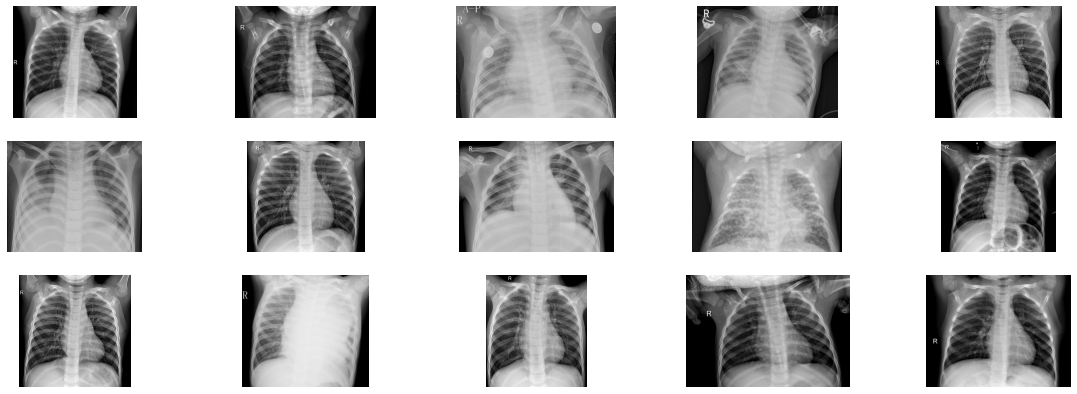

In [13]:
# realizando um laço de repetição para plotar as imagens
plt.figure(figsize=(20,7))

for i in range(num_images):
    plt.subplot(3,5, 1 + i)
    plt.axis('off')
    plt.imshow(images[i])

plt.show()

In [14]:

# instanciando o caminho do diretório/pasta das imagens de treino 
train_filepath = os.listdir('raio-x-torax/treino')

# lista para salvar as informações
categories = []

# realizando um laço de repetição e salvando os resultados na lista "categories"
for f_name in train_filepath:
    category = f_name.split('.')[0]

    if category == 'pneumonia':
        categories.append(1)
    else:
        categories.append(0)

In [15]:
# importando biblioteca para manipulação e análise de dados
import pandas as pd

# visualizando a versão da biblioteca utilizada
print(pd.__version__)

1.3.0


In [16]:
# instanciando um dataframe com as informações em:
# 'filename': train_filepath
# 'category': categories

# utilizando o formato de dicionário
df = pd.DataFrame({
    'filename': train_filepath,
    'category': categories
})

# visualizando as 10 últimas observações 
df.tail(10)

,filename,category
90,normal.5.jpeg,0
91,pneumonia.3.jpeg,1
92,pneumonia.0.jpeg,1
93,pneumonia.12.jpeg,1
94,pneumonia.48.jpeg,1
95,normal.25.jpeg,0
96,normal.1.jpeg,0
97,pneumonia.24.jpeg,1
98,normal.41.jpeg,0
99,normal.3.jpeg,0


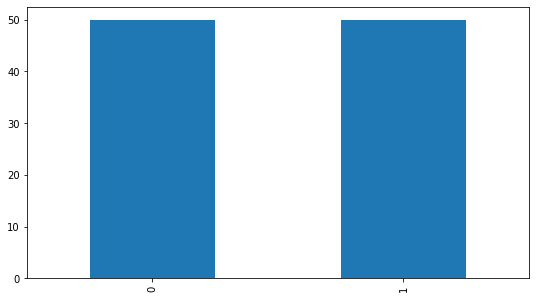

In [17]:
# plotando gráfico de barras das instâncias presentes em cada classe
df['category'].value_counts().plot.bar(figsize=(9,5));

In [18]:
# visualizando a quantidade de observações e a frequência em cada classe
print(
    df['category'].value_counts(),
    round(df['category'].value_counts(normalize=True) * 100, 2),
    sep='\n\n'
)

0    50
1    50
Name: category, dtype: int64

0    50.0
1    50.0
Name: category, dtype: float64


A linha de código abaixo irar instalar o `tensorflow`, biblioteca necessária para construção da RNA.

In [20]:
pip install tensorflow==2.2

  Using cached tensorflow-2.2.0-cp38-cp38-manylinux2010_x86_64.whl (516.3 MB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Using cached grpcio-1.43.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.1 MB)
  Using cached scipy-1.4.1-cp38-cp38-manylinux1_x86_64.whl (26.0 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached h5py-2.10.0-cp38-cp38-manylinux1_x86_64.whl (2.9 MB)
  Using cached wrapt-1.13.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (84 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached google_auth-1.35.0-py2.py3-none-any.whl (152 kB)
ERROR: h5 0.5.2 has requirement h5py<4.0.0,>=3.2.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.

In [22]:
# visualizando a versão utilizada da biblioteca
import tensorflow as tf
print(tf.__version__)

2.2.0


In [23]:
# importando as funções necessárias para construção do modelo de RNA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
                                    Dropout, Flatten, Dense,\
                                    Activation, BatchNormalization

In [24]:
# instanciando as propriedades das imagens
image_widht = 128                           # largura da imagem
image_height = 128                          # altura da imagem
image_size = (image_widht, image_height)    # tamanho da imagem
image_channels = 3                          # quantidade de canais das cores (RGB)

In [25]:
# instanciando o modelo de rede neural artificial
model = Sequential()

# definindo as camadas da RNA
model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(image_widht, image_height, image_channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


2022-02-16 12:59:11.769886: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/fgalvao77/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-02-16 12:59:11.769911: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-16 12:59:11.769928: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fgalvao77-inspiron-3583): /proc/driver/nvidia/version does not exist
2022-02-16 12:59:11.770164: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-02-16 12:59:12.736984: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 1800000000 Hz
2022-02-16 12:59:12.737345: I tensorflow/compiler/xla/service/ser

In [26]:
# compilando o modelo e definindo a função de perda, otimizador e a métrica
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [27]:
# visualizando o sumário geral do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [28]:
# importando as funções de parada e redução da taxa de aprendizagem
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [29]:
# instanciando a função de parada
early_stop = EarlyStopping(patience=30)

# instanciando a redução da taxa de aprendizagem
# métricas que podem ser utilizadas: loss,accuracy,val_loss,val_accuracy e lr
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, verbose=1, 
                                            factor=0.5, lr=0.1e-4) # 0.00001 = 0.1e-4

# instanciando o "callbacks" com os obejtos instanciados acima
callbacks=[early_stop, learning_rate_reduction]

In [30]:
# transformando as instâncias da variável alvo de numérico para categórico
df['category'] = df['category'].replace({0: 'normal', 1: 'pneumonia'})

In [31]:
# visualizando as instâncias únicas presentes na variável alvo
df['category'].unique()

array(['normal', 'pneumonia'], dtype=object)

In [32]:
# função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

In [33]:
# instanciando os dados de treino e validação
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

In [34]:
# resetando os índices dos conjuntos de dados do treino e validação
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [36]:
# instanciando a quantidade de instâncias nos conjuntos de dados de treino e validação
# total_train = train_df.shape[0]
# total_validate = validate_df.shape[0]
# batch_size = 10

# total_train, total_validate, batch_size

In [37]:
# instanciando a quantidade de observações nos conjuntos de dados de treino e validação
total_train = len(train_df)
total_validate = len(validate_df)
batch_size = 10

# visualizando a quantidade de observações nos objetos
total_train, total_validate, batch_size

(80, 20, 10)

In [38]:
# importando as funções para RNA (rede neural artificial)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
# definindo o gerador de treino
train_datagenerator = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# visualizando o endereço de memória do objeto
train_datagenerator

In [40]:
# instanciando os dados do gerador de treino
train_generator = train_datagenerator.flow_from_dataframe(
    train_df,
    'raio-x-torax/treino',
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
train_generator

Found 80 validated image filenames belonging to 2 classes.


In [41]:
# definindo o gerador de validação
validation_datagenerator = ImageDataGenerator(rescale=1.0 / 255)
validation_datagenerator  # visualizando o endereço de memória do objeto

In [42]:
# definindo os dados do gerador de validação
validation_generator = validation_datagenerator.flow_from_dataframe(
    validate_df,
    'raio-x-torax/treino/',
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_model='categorical',
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
validation_generator

Found 20 validated image filenames belonging to 2 classes.


In [45]:
# definindo o gerador de teste
test_datagenerator = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# visualizando o endereço de memória do objeto
test_datagenerator

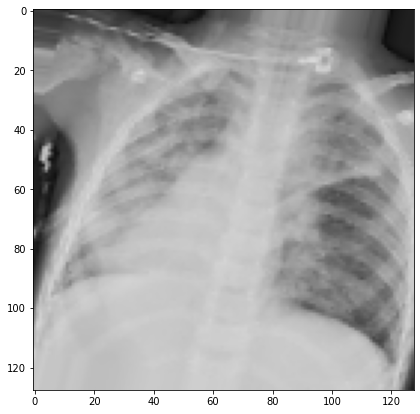

In [46]:
# plotando uma imagem do conjunto de dados de treino
X, y = train_generator.next()
plt.figure(figsize=(9, 7))

for i in range(0, 1):
    random_image = X[i]
    plt.imshow(random_image)
    plt.show();

In [47]:
# definindo o número de épocas de treinamento
epochs = 300

# realizando o treinamento do modelo
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)

Epoch 1/300


2022-02-16 13:01:37.572276: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 51380224 exceeds 10% of free system memory.
2022-02-16 13:01:40.838547: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 51380224 exceeds 10% of free system memory.


8/8 [==============================] - 8s 980ms/step - loss: 0.5247 - accuracy: 0.8625 - val_loss: 3.2025 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 2/300
8/8 [==============================] - 3s 426ms/step - loss: 0.2222 - accuracy: 0.9500 - val_loss: 4.0623 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 3/300
8/8 [==============================] - ETA: 0s - loss: 0.5469 - accuracy: 0.8250
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
8/8 [==============================] - 3s 430ms/step - loss: 0.5469 - accuracy: 0.8250 - val_loss: 8.4855 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 4/300
8/8 [==============================] - 3s 421ms/step - loss: 0.1262 - accuracy: 0.9500 - val_loss: 9.1779 - val_accuracy: 0.3500 - lr: 5.0000e-04
Epoch 5/300
8/8 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9875
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
8/8 [==============================] - 3s 427ms/step - los

Se necessário instalar as bibliotecas, descomente os códigos abaixos.

In [ ]:
#pip install h5py --upgrade 

In [ ]:
#pip install h5 --upgrade

In [48]:
# bibliotecas que podemos usar para salvar o modelo
import h5py
import h5

In [49]:
# versão atual da biblioteca
print(h5py.__version__)
print(h5.__version__)

2.10.0
0.5.2


In [50]:
# realizando teste de funcionalidade da biblioteca
# 0: não
# 1: sim
h5py.run_tests()

Tests require pytest, pytest not installed


1

Para esse caso, utilizarei a biblioteca `h5` para salvar o modelo.

In [51]:
# salvando o modelo
model.save('model_deteccaoPneumoniaRaioX.h5')
model # visualizando o endereço de memória do objeto

In [ ]:
# salvando o modelo
# model.save('model_deteccaoPneumoniaRaioX.h5py')
# model # visualizando o endereço de memória do objeto

In [52]:
# instanciando os dados de teste
test_filepath = os.listdir('raio-x-torax/teste/')

In [53]:
# instanciando um dataframe com os dados de teste
test_df = pd.DataFrame(
    {'filename': test_filepath}
)

# visualizando as observações do dataframe criado
test_df

,filename
0,7.jpeg
1,36.jpeg
2,4.jpeg
3,16.jpeg
4,8.jpeg
5,45.jpeg
6,23.jpeg
7,21.jpeg
8,9.jpeg
9,15.jpeg


In [54]:
# instanciando os dados do gerador de teste
test_generator = train_datagenerator.flow_from_dataframe(
    test_df,
    'raio-x-torax/teste',
    x_col='filename',
    y_col=None,
    target_size=image_size,
    class_mode=None,
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
test_generator

Found 50 validated image filenames.


In [55]:
# definindo o número de amostras
nb_samples = test_df.shape[0]
nb_samples  # visualizando a quantidade de amostras

50

In [56]:
# realizando as predições com o modelo
predict = model.predict(test_generator, steps=np.ceil(nb_samples / batch_size))
predict  # visualizando as predições

array([[9.3425118e-19, 1.0000000e+00],
       [4.8017584e-28, 1.0000000e+00],
       [3.1612392e-35, 1.0000000e+00],
       [3.3316809e-28, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [6.0029841e-20, 1.0000000e+00],
       [5.2944928e-24, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [4.1732800e-32, 1.0000000e+00],
       [5.5370432e-29, 1.0000000e+00],
       [1.8397900e-19, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [3.7773336e-21, 1.0000000e+00],
       [9.1441459e-26, 1.0000000e+00],
       [2.2321013e-24, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [3.8077874e-36, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [8.7600902e-26, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [3.4779168e-22, 1.0000000e+00],
       [4.6217675e-37, 1.0000000e+00],
       [0.0000000e+00, 1.

In [57]:
# realizando a conversão dos rótulos (labels) de numérico para categórico
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((values, keys) for keys, values in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace(
    {'pneumonia': 1, 'normal': 0}
)

# visualizando o dataframe criado
test_df

,filename,category
0,7.jpeg,1
1,36.jpeg,1
2,4.jpeg,1
3,16.jpeg,1
4,8.jpeg,1
5,45.jpeg,1
6,23.jpeg,1
7,21.jpeg,1
8,9.jpeg,1
9,15.jpeg,1


In [58]:
# instanciando 18 amostras aleatórias do dataframe "test_df"
# sample_test = test_df.head(18)
sample_test = test_df.sample(18)

# resetando os índices
sample_test = sample_test.reset_index(drop=True)
sample_test  # visualizando os dados das amostras selecionadas

,filename,category
0,44.jpeg,1
1,8.jpeg,1
2,14.jpeg,1
3,38.jpeg,1
4,50.jpeg,1
5,2.jpeg,1
6,42.jpeg,1
7,37.jpeg,1
8,1.jpeg,1
9,17.jpeg,1


In [59]:
# importando a função para leitura de imagem
from tensorflow.keras.preprocessing.image import load_img

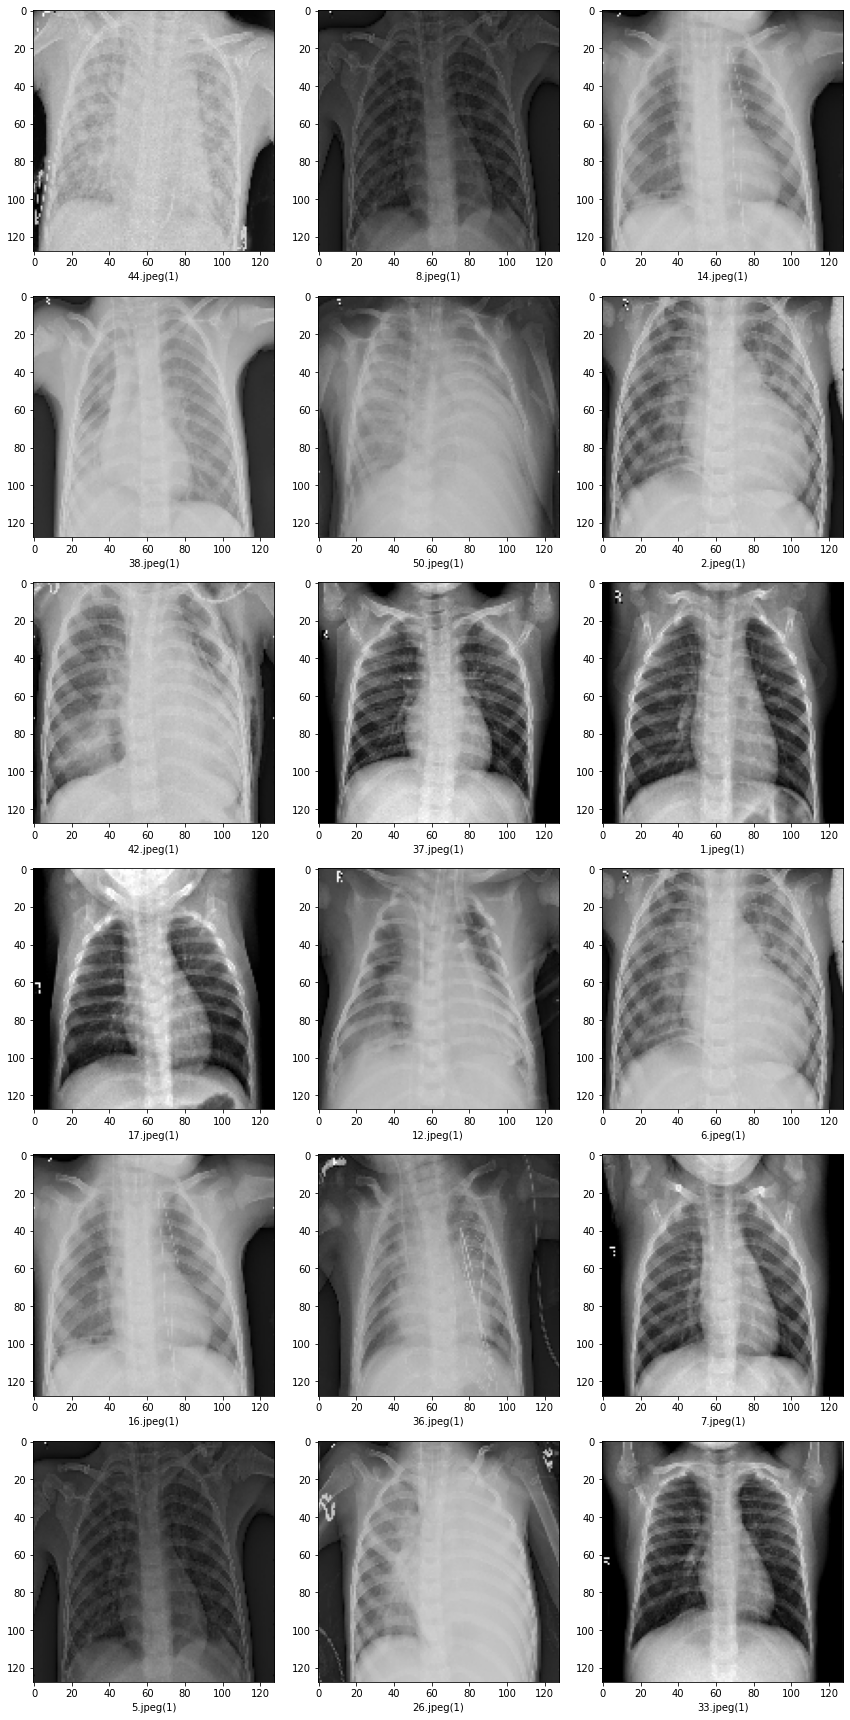

In [60]:
# plotando as 18 imagens da amostra
plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']

    img = load_img('raio-x-torax/teste/' + filename, target_size=image_size)

    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')

plt.tight_layout()
plt.show()

In [61]:
# importando as bibliotecas e as funções
import numpy as np
import cv2
import tensorflow as tf

from tensorflow import keras
from PIL import Image

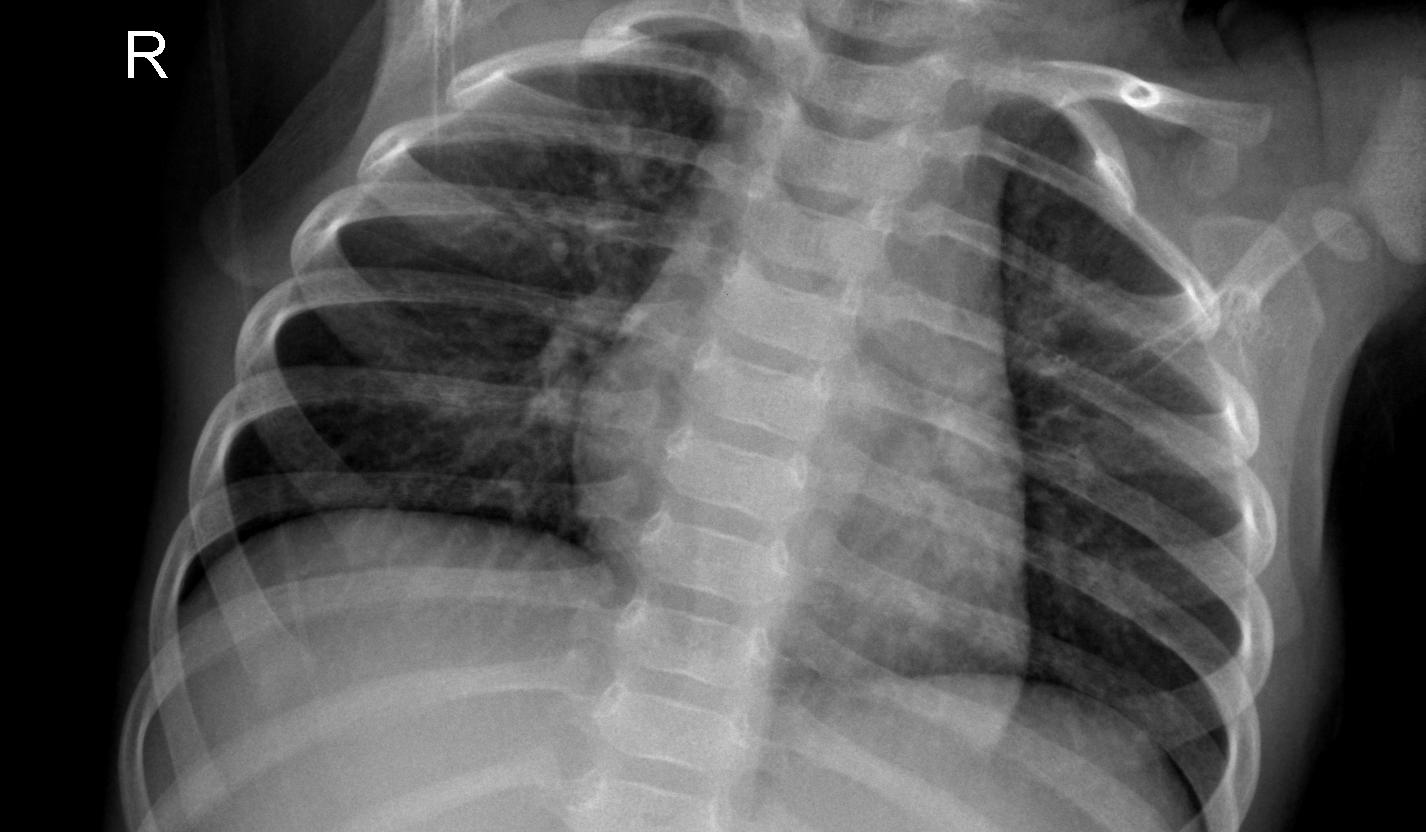

In [62]:
# instanciando uma imagem
i = Image.open('raio-x-torax/teste/11.jpeg')

# visualizando a imagem
i

In [63]:
# redimensionado a imagem
img = i.resize(image_size)
# img = (np.random.standard_normal([128,128,3]) * 255).astype(np.uint8)
img = (np.random.standard_normal([128, 128, 3]) * 255)
img = np.expand_dims(img, axis=0)
img = np.array(img)
img = img / 255

# realizando a predição da imagem com o modelo
pred_img = model.predict([img])[0]
pred_img  # visualizando o resultado da predição

array([4.0881287e-06, 9.9999595e-01], dtype=float32)

Diagnóstico indicado: RX pneumonia


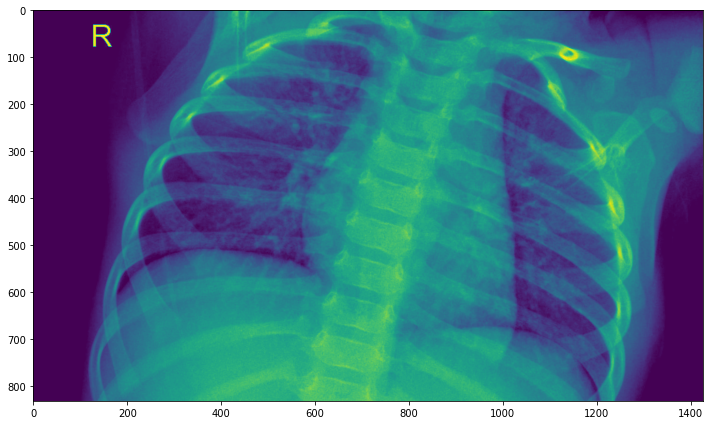

In [64]:
# plotando a imagem e seu dignóstico
if pred_img[0] > pred_img[1]:
    print('Diagnóstico indicado: RX normal')
else:
    print('Diagnóstico indicado: RX pneumonia')

plt.figure(figsize=(12, 24))
plt.imshow(i)
plt.show()

Instalando a biblioteca `Image`.

In [ ]:
# pip install Image --upgrade

In [65]:
# visualizando a versão utilizada da biblioteca
from PIL import Image
print(Image.__version__)

9.0.1


In [ ]:
#from PIL import ImageTk

In [84]:
# importando as bibliotecas e as funções
import numpy as np
import os
import tkinter as tk

from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk
from tensorflow.keras.models import load_model

In [ ]:
# teste de funcionalidade da biblioteca 
# import tkinter
# tkinter._test()

In [85]:
# carregando o modelo no objeto "model"
model = load_model('model_deteccaoPneumoniaRaioX.h5')
model   # visualizando o endereço de memória do objeto

In [ ]:
# # carregando o modelo no objeto "model"
# model = load_model('model_deteccaoPneumoniaRaioX.h5py')
# model   # visualizando o endereço de memória do objeto

In [86]:
# iniciando o ambiente GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Classificação para raio-x de tórax')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))

sign_image = Label(top)


In [87]:
# função para classificação da imagem
def classify(file_path):
    global label_packed
    
    image = Image.open(file_path)
    image = (np.random.standard_normal([128, 128, 3]) * 255)
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    image = image / 255
    
    pred = model.predict([image])[0]
    basename = os.path.basename(file_path)
    name = int(basename.rsplit('.', 1)[0]) 
    
    if pred[0] > pred[1]:
        sign ='Diagnóstico indicado: RX normal'
    else:
        sign = 'Diagnóstico indicado: RX pneumonia'
    print(sign)
    
    label.configure(foreground='#011638', text=f'{sign} {str(max(pred * 100))} {str("%")}') 

In [88]:
# função para exibição da janela
def show_classify_button(file_path):
    classify_b = Button(top, text='Classificar imagem', command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

In [89]:
# função para realizar o carregamento da imagem
def upload_image():
    try:
        file_path = filedialog.askopenfilename()

        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))

        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im

        label.configure(text='')

        show_classify_button(file_path)

    except:
        pass

In [90]:
# gerando a janela para carregamento da imagem
upload = Button(top, text='Upload da imagem',
                command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white',
                 font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)

sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)

heading = Label(top, text='Classificação para raio-x de tórax',
                pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()

Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia
